In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
%matplotlib inline

# Plane fit

Se pretende determinar los parametros $A,B$ y $C$ de la función $f(x,y)=Ax+By+C$ que representa un plano dado un  conjunto de puntos $\{[x_{1},y_{1},z_{1}]...[x_{n},y_{n},z_{n}]\}$ con el método de mínimos cuadrados. la función a minimizar será la distancia al cuadrado de un punto con el plano.

In [2]:
def plot_plane(A,B,C,figure,R):
    # Plane: z = Ax+By+C
    # create x,y
    xx, yy = np.meshgrid(range(-R,R), range(-R,R))
    z = A*xx + B*yy + C
    figure.plot_surface(xx, yy, z,alpha=0.1)
    
def dist_point_plane(a,b,c,d,point):
    x,y,z = point
    dist = np.abs(a*x+b*y+c*z+d)/np.linalg.norm([a,b,c])
    return dist
    
def sigma(A,B,C,set_points):# Calcula el promedio de las distancias de los puntos al plano ajustado 
    suma = 0
    for points in set_points:
        suma = suma + dist_point_plane(-A,-B,1,-C,points)
    return suma/len(set_points)

def plane(x, y, params):
    A = params[0]
    B = params[1]
    C = params[2]
    z = A*x + B*y + C
    return z

def error(params, points): #funcion a minimizar
    result = 0
    for (x,y,z) in points:
        plane_z = plane(x, y, params) #definimos un plano z=f(x,y) que depende de los parametros a minimizar 
        diff = plane_z - z # se calcula la diferencia entre el punto z (dato) y el punto z del plano calculado
        result += diff**2
    return result #result tendra la suma de los cuadrados de las distancias

## Test

El plano: f(x,y) = Ax+By+C tiene como parametros

A = 0.943  B = 3.063  C = 1.054
El sigma es de: 0.0556872439596


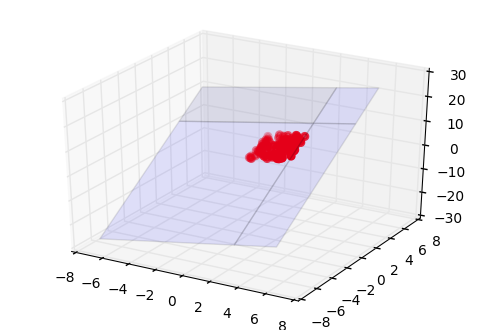

In [3]:
figure = plt.figure().gca(projection='3d')

#Se genera un set de datos x,y de forma aleatoria
x_value = 3*np.random.random_sample(100)
y_value = 2*np.random.random_sample(100)

#                   IMPORTANTE
#Se asume que cada punto pertenece a un plano diferente
#Pero siguen una distribucion normal en los parametros
#Por lo que el resultado deberia parecerce a la media de los parametros
#loc es la media y scale el sigma de la gausseana, se puede jugar con estos parametros
#A scale muy alto se pierde simetría del problema y en ese caso habría que pesar los datos
#Si en la simulacion es un disco bien definido no deberia haber mayores problemas
Arand = np.random.normal(loc=1,scale=0.1,size=100)
Brand = np.random.normal(loc=3,scale=0.2,size=100)
Crand = np.random.normal(loc=1,scale=0.1,size=100)

z_value = plane(x_value,y_value,[Arand,Brand,Crand])

points = np.stack([x_value,y_value,z_value],axis=1)

#Realiza minimos cuadrados a la funcion error con argumentos los puntos
x0 = [0,0,0]
result = least_squares(error, x0, args=(points,)) 

A,B,C = result.x[0],result.x[1],result.x[2]

print 'El plano: f(x,y) = Ax+By+C tiene como parametros\n'
print 'A =','%.3f'%A,' B =','%.3f'%B,' C =','%.3f'%C
print 'El sigma es de:',sigma(A,B,C,points)

plot_plane(A,B,C,figure,7)
figure.scatter(points[:,0],points[:,1],points[:,2],color='red',linewidths=2)

plt.show()